## Examining and processing MPC dataset 

In [1]:
## the data are files inside the MPC CORPUS/chat_sessions_annotated
import os

def get_files():
    files = []
    for root, dirs, file in os.walk("MPC CORPUS/chat_sessions_annotated"):
        for f in file:
            files.append(os.path.join(root, f))
    return files

files=get_files()

In [13]:
## read xml files, each line is a message with annotations tags
import xml.etree.ElementTree as ET

def read_file(file):
    tree = ET.parse(file)
    convo = file.replace(".xml","")
    root = tree.getroot()
    messages = []
    for message in root.findall('turn'):
        # turn it into a dictionary of text and annotations (annotations are inside attributes)
        message_dict = {}
        # attributes
        for key, value in message.items():
            message_dict[key] = value
        # text
        message_dict['text'] = message.text
        message_dict['session'] = convo
        messages.append(message_dict)


        
    return messages

messages = []
for file in files:
    messages += read_file(file)

In [17]:
# load messages into a pandas dataframe
import pandas as pd

df = pd.DataFrame(messages)

In [24]:
df.head()

,comm_act_type,dialog_act,end_time,link_to,mode,polarity,pos,pos_count,pos_origin,speaker,topic,turn_no,text,session,start_time
0,response-to,COMM-MGMT:Other-Conventional-Phrase,09:24:25 AM,,chat,,,,,moderator,,1,link,MPC CORPUS/chat_sessions_annotated/Mar14_Group...,NaN
1,addressed-to,COMM-MGMT:Assertion-Opinion,10:01:12 AM,all-users,chat,,,1,;topic(2.1),cintihia,,2,cool topic,MPC CORPUS/chat_sessions_annotated/Mar14_Group...,NaN
2,addressed-to,COMM-MGMT:Conventional-Opening,10:01:41 AM,all-users,chat,,,1,;people(3.1),moderator,,3,:-) thanks....good morning...just waiting for ...,MPC CORPUS/chat_sessions_annotated/Mar14_Group...,NaN
3,addressed-to,COMM-MGMT:Acknowledge,10:01:50 AM,all-users,chat,,,,,ted,,4,ok,MPC CORPUS/chat_sessions_annotated/Mar14_Group...,NaN
4,addressed-to,COMM-MGMT:Conventional-Opening,10:05:07 AM,all-users,chat,,,,,ariel,,5,hi,MPC CORPUS/chat_sessions_annotated/Mar14_Group...,NaN


In [39]:
# see what lines are missing dialog acts
(df["dialog_act"]=="").sum()

753

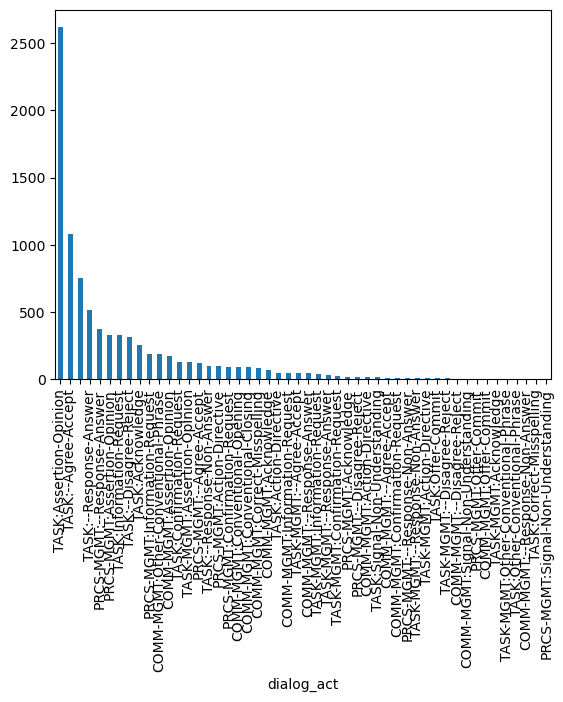

In [40]:
# plot the distribution of dialog acts
import matplotlib.pyplot as plt
df["dialog_act"].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='session'>

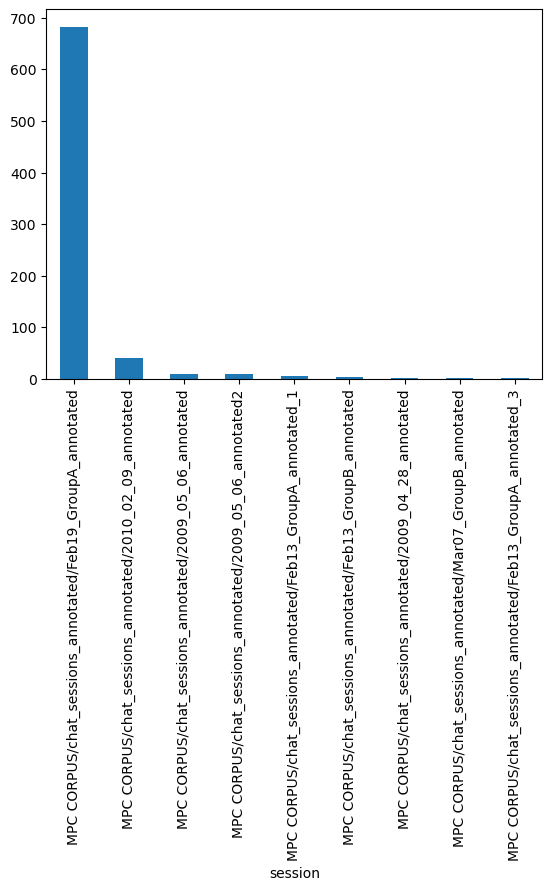

In [51]:
## plot the session of messages without dialog acts
df[df.dialog_act==""]["session"].value_counts().plot(kind='bar')

In [71]:
## drop them
df = df[df.dialog_act!=""]

In [77]:
# save the dataframe to jsons
df.to_json("MPC_CORPUS.jsonl", orient='records', lines=True)